## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1),
                               kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8]
L2_EXP = [1e-4, 1e-8]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1_ratio in L1_EXP:
    for l2_ratio in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer l1 = %s, l2 = %s" % (str(l1_ratio), str(l2_ratio)))
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1_ratio, l2_ratio=l2_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1_ratio), str(l2_ratio))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer l1 = 0.01, l2 = 0.0001
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instruction

50000/50000 [==============================] - 4s 79us/step - loss: 2.4626 - acc: 0.0974 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.4626 - acc: 0.0968 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4624 - val_acc: 0.1000
Experiment with Regulizer l1 = 0.01, l2 = 1e-08
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense) 

50000/50000 [==============================] - 4s 79us/step - loss: 2.4626 - acc: 0.0987 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.4626 - acc: 0.0966 - val_loss: 2.4627 - val_acc: 0.1000
Experiment with Regulizer l1 = 0.0001, l2 = 0.0001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)           

50000/50000 [==============================] - 4s 79us/step - loss: 2.6067 - acc: 0.6264 - val_loss: 2.8668 - val_acc: 0.5287
Experiment with Regulizer l1 = 0.0001, l2 = 1e-08
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
______________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.1907 - acc: 0.2609 - val_loss: 2.0307 - val_acc: 0.3326
Epoch 2/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9692 - acc: 0.3577 - val_loss: 1.9233 - val_acc: 0.3719
Epoch 3/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.8823 - acc: 0.3885 - val_loss: 1.8507 - val_acc: 0.4031
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8243 - acc: 0.4109 - val_loss: 1.8020 - val_acc: 0.4134
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7728 - acc: 0.4275 - val_loss: 1.7600 - val_acc: 0.4281
Epoch 6/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7323 - acc: 0.4412 - val_loss: 1.7234 - val_acc: 0.4397
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6962 - acc: 0.4567 - val_loss: 1.6954 - val_acc

50000/50000 [==============================] - 4s 80us/step - loss: 1.8287 - acc: 0.3576 - val_loss: 1.7795 - val_acc: 0.3731
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.7408 - acc: 0.3907 - val_loss: 1.7097 - val_acc: 0.4000
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6801 - acc: 0.4135 - val_loss: 1.6584 - val_acc: 0.4191
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.6334 - acc: 0.4286 - val_loss: 1.6155 - val_acc: 0.4372
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5920 - acc: 0.4429 - val_loss: 1.5865 - val_acc: 0.4453
Epoch 7/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5580 - acc: 0.4561 - val_loss: 1.5579 - val_acc: 0.4525
Epoch 8/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5258 - acc: 0.4668 - val_loss: 1.5339 - val_acc: 0.4578
Epoch 9/50
50000/50000 [============================

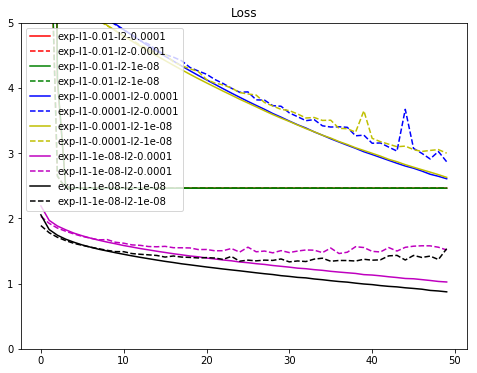

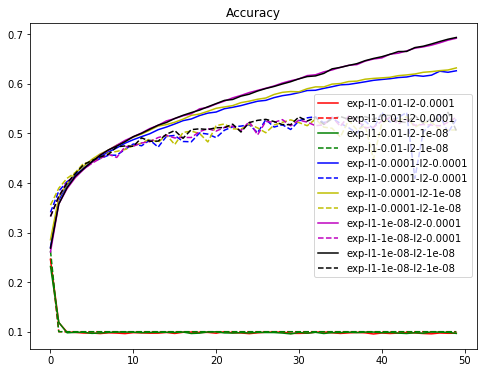

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()